# Evaluación 2

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función *odeint* de *scipy.integrate*.
<br>
<br>La ecuación diferencial del oscilador amortiguado y forzado es:
<center> $\frac{d^2x}{dt^2}+2\zeta\omega_n\frac{dx}{dt}+\omega_n^2x=\frac{1}{m}F_0sin(\omega t) $ </center>
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación
<center>$\omega_n=\sqrt{\frac{k}{m}}$</center>
y $\zeta$ es la tasa de amortiguamiento dado por la expresión
<center> $\zeta=\frac{c}{2\sqrt{mk}}$ </center>
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.
<br>
<br>El lado derecho de la ecuación diferencial, es un término de forzamiento tiepo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ $(\omega\neq\omega_n)$ 

El valor del coeficiente $\zeta$ determinará el tipo de movimiento del oscilador
* Movimiento sobreamortiguado ($\zeta>1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
* Críticamente amortiguado ($\zeta=1$).
* Movimiento subamortiguado (\zeta<1). Movimiento periódico que decae exponencialmente.
* Movimiento sin amortiguamiento (\zeta=0). Movimiento periódico regular.

**Desarrollando la ecuación diferencial**
* Hacemos:
<center>$x_1=x$ y $x_2=x'$</center>
* Entonces:
<center>$x_1'=x'=x_2$ y $x_2'=x''$</center>
* Sustituyendo en la ecuación:
<center>$x_2'+2\zeta\omega_nx_2+\omega_n^2x_1=\frac{1}{m}F_0sin(\omega t)$</center>
<center>$x_2'=\frac{1}{m}F_0sin(\omega t)-\omega_n^2x_1-2\zeta\omega_nx_2$</center>
* Vemos entonces que nuestro sistema de ecuaciones es:
<center>$x_1'=0x+1x_1 +0 $</center>
<center>$x_2'=-\omega_n^2x_1-2\zeta\omega_nx_2+\frac{1}{m}F_0sin(\omega t)$</center>
* En forma matricial:
<center>$\frac{\vec{dx}}{dt}=\begin{bmatrix} 0 & 1 \\ -\omega_n^2 & -2\zeta\omega_n \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}+\begin{bmatrix} 0 \\ \frac{1}{m}F_0sin(\omega t) \end{bmatrix}$</center>
* Nuestra matriz A es:
<center>$A=\begin{bmatrix} 0 & 1 \\ -\omega_n^2 & -2\zeta\omega_n \end{bmatrix}$</center>


In [280]:
#Importamos bibliotecas
import numpy as np
from scipy import integrate, linalg
import pylab as pl
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint, solve_ivp
from numpy.linalg import matrix_power as mpow

**Problema 1**
<br>
<br>Resuelva numéricamente primero el caso de un oscilador amortiguado sin forzamiento ($\zeta\neq0$, $F_0=0$ ).
<br>
<br>Supongo que: $m=1$, $k=9$, $x(0)<0$, $x'(0)=0$.
<br>
<br>Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$.
<br>![picture](https://drive.google.com/uc?export=view&id=13NfcpEaM6yTQsVg1qJHDI5GeYV9eYgao)</center>


Dado que $k=9$ y $m=1$, entonces tenemos que $\omega_n=3$

In [358]:
# Definimos un vector X: X[0]=x1, X[1]=x2
wn=3
def f1(X, t=0):
    return np.array([X[1],-wn**2*X[0]-2*zet*wn*X[1]])

In [359]:
# Integramos el sistema de ecuaciones usando odeint
t = np.linspace(0, 4*np.pi,  1000)              # Rango de tiempo de integración
X0 = np.array([-1, 0])                     # Condiciones iniciales: x(0)=-1 y x'(0)=0
zet=0
X1, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=0.1
X2, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=0.2
X3, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=0.4
X4, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=0.7
X5, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=1
X6, infodict = integrate.odeint(f1, X0, t, full_output=True)
zet=2
X7, infodict = integrate.odeint(f1, X0, t, full_output=True)                             
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

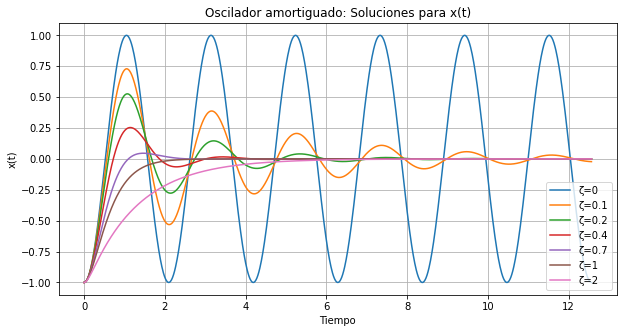

In [360]:
#Ponemos en arreglos más manejables la información obtenida
x1, v1 = X1.T
x2, v2 = X2.T
x3, v3 = X3.T
x4, v4 = X4.T
x5, v5 = X5.T
x6, v6 = X6.T
x7, v7 = X7.T

#Graficamos las soluciones de x(t)
f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x1, label='ζ=0');
plt.plot(t, x2, label='ζ=0.1');
plt.plot(t, x3, label='ζ=0.2');
plt.plot(t, x4, label='ζ=0.4');
plt.plot(t, x5, label='ζ=0.7');
plt.plot(t, x6, label='ζ=1');
plt.plot(t, x7, label='ζ=2');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('Tiempo');
plt.ylabel('x(t)');
plt.title('Oscilador amortiguado: Soluciones para x(t)');
plt.show();

<Figure size 432x288 with 0 Axes>

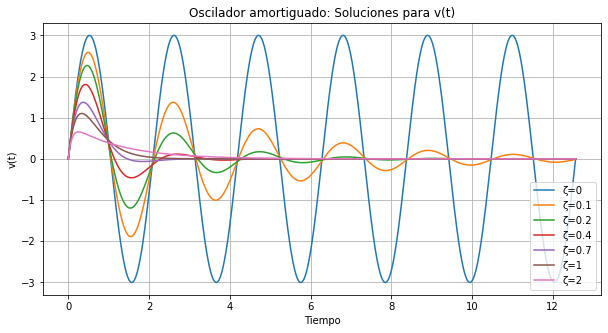

In [362]:
#Graficamos las soluciones de v(t)
f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, v1, label='ζ=0');
plt.plot(t, v2, label='ζ=0.1');
plt.plot(t, v3, label='ζ=0.2');
plt.plot(t, v4, label='ζ=0.4');
plt.plot(t, v5, label='ζ=0.7');
plt.plot(t, v6, label='ζ=1');
plt.plot(t, v7, label='ζ=2');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('Tiempo');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Soluciones para v(t)');
plt.show();

No handles with labels found to put in legend.


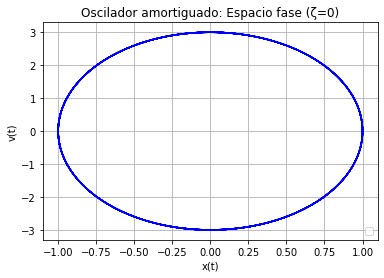

No handles with labels found to put in legend.


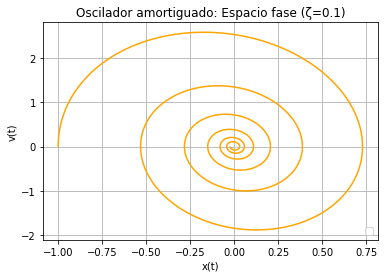

No handles with labels found to put in legend.


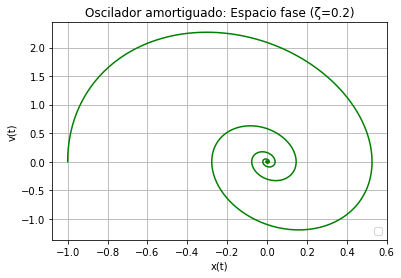

No handles with labels found to put in legend.


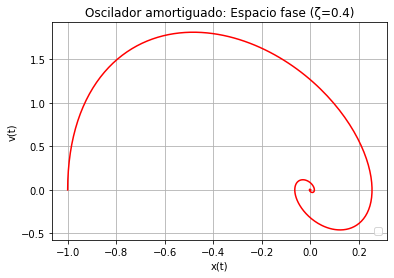

No handles with labels found to put in legend.


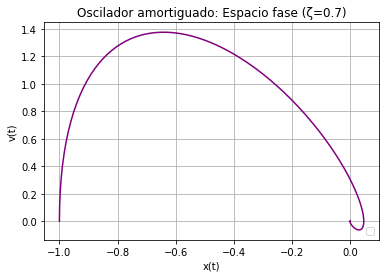

No handles with labels found to put in legend.


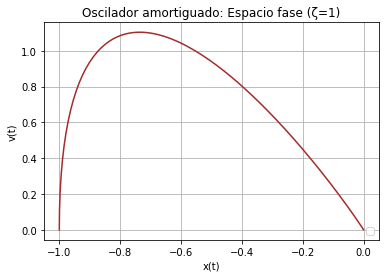

No handles with labels found to put in legend.


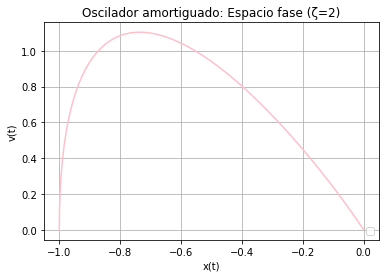

In [363]:
#Graficamos el espacio fase para cada caso
f1 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x1, v1, 'b');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=0)');
plt.show();

f2 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x2, v2, 'orange');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=0.1)');
plt.show();

f3 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x3, v3, 'g');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=0.2)');
plt.show();

f4 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x4, v4, 'r');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=0.4)');
plt.show();

f5 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x5, v5, 'purple');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=0.7)');
plt.show();

f6 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x6, v6, 'brown');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=1)');
plt.show();

f7 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x6, v6, 'pink');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador amortiguado: Espacio fase (ζ=2)');
plt.show();

**Problema 2**
<br>
<br>Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta=0$, $F_0\neq0$).
<br>
<br>Suponga que: $F_0=1$, $m=1$, $k=9$, $x(0)=0$, $x'(0)=0$.
<br>
<br>Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega=3,3.1,3.3,3.5$
<br>![picture](https://drive.google.com/uc?export=view&id=1mXHeAqL9lmi9xGulbZqMHq51vK_VC2I9)</center>


La ecuación que describe un oscilador forzado sin amortiguamiento es

<center>$\frac{d^2x}{dt^2}+\omega_n^2x=\frac{1}{m}F_0sin(\omega t) $</center>

De esto sale que la ecuación que nos describe las gráficas de pulsaciones y resonancia es:

<center>$x(t)=\frac{2*F_0}{m(\omega_0^2-\omega^2)}sin(\frac{\omega_0-\omega}{2}t)sin(\frac{\omega_0+\omega}{2}t)$</center>

In [364]:
# Definimos un vector X: X[0]=x1, X[1]=x2
wn=3
F0=1
def f1(X, t=0):
    return np.array([X[1],-wn**2*X[0]+F0*np.sin(w*t)])

In [365]:
# Integramos el sistema de ecuaciones usando odeint
t = np.linspace(0, 16*np.pi,  1000)              # Rango de tiempo de integración
X0 = np.array([0, 0])                     # Condiciones iniciales: x(0)=-1 y x'(0)=0
w=3
X1, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.1
X2, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.3
X3, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.5
X4, infodict = integrate.odeint(f1, X0, t, full_output=True)

infodict['message']

'Integration successful.'

In [366]:
#Ponemos en arreglos más manejables la información obtenida
x1, v1 = X1.T
x2, v2 = X2.T
x3, v3 = X3.T
x4, v4 = X4.T

No handles with labels found to put in legend.


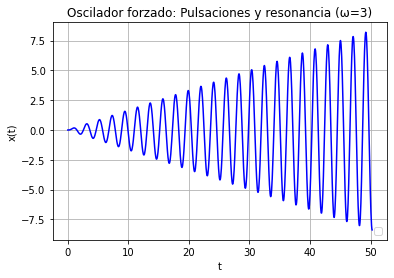

No handles with labels found to put in legend.


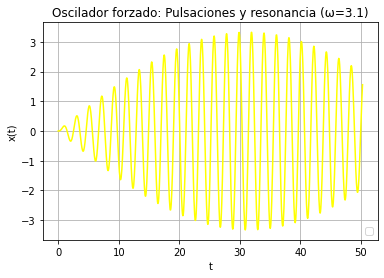

No handles with labels found to put in legend.


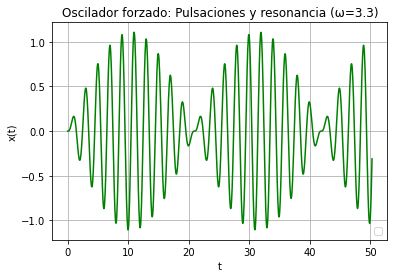

No handles with labels found to put in legend.


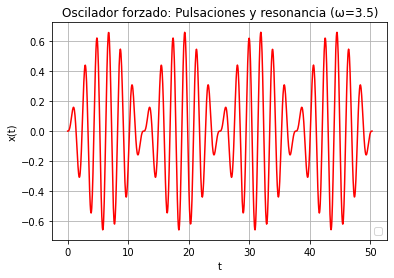

In [367]:
#Graficamos el espacio fase para cada caso
f1 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(t, x1, 'b');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title('Oscilador forzado: Pulsaciones y resonancia (ω=3)');
plt.show();

f2 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(t, x2, 'yellow');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title('Oscilador forzado: Pulsaciones y resonancia (ω=3.1)');
plt.show();

f3 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(t, x3, 'g');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title('Oscilador forzado: Pulsaciones y resonancia (ω=3.3)');
plt.show();

f4 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(t, x4, 'r');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title('Oscilador forzado: Pulsaciones y resonancia (ω=3.5)');
plt.show();

No handles with labels found to put in legend.


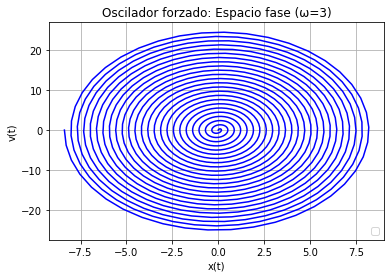

No handles with labels found to put in legend.


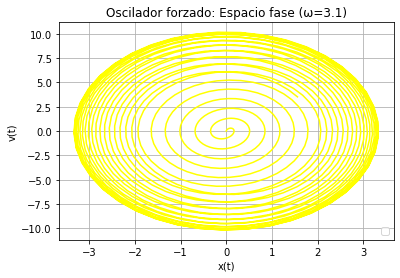

No handles with labels found to put in legend.


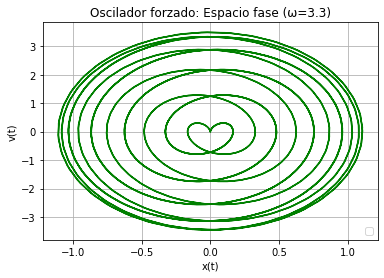

No handles with labels found to put in legend.


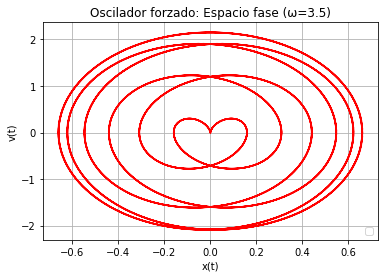

In [368]:
#Graficamos el espacio fase para cada caso
f1 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x1, v1, 'b');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado: Espacio fase (ω=3)');
plt.show();

f2 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x2, v2, 'yellow');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado: Espacio fase (ω=3.1)');
plt.show();

f3 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x3, v3, 'g');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado: Espacio fase (ω=3.3)');
plt.show();

f4 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x4, v4, 'r');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado: Espacio fase (ω=3.5)');
plt.show();

**Problema 3**
<br>
<br>Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta\neq0$, $F_0\neq0$).
<br>
<br>Suponga un coeficiente de amortiguamiento $\zeta=0.1$.
<br>
<br>Tome los mismos valores del problema anterior: $F_0=1$, $m=1$, $k=9$, $x(0)=0$, $x'(0)=0$.
<br>
<br>Reproduzca en una gráfica en el plano fase ($x$, $x'$), para las frecuencias de forzamiento: $\omega=3,3.1,3.3,3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [382]:
#Definimos un vector X: X[0]=x1, X[1]=x2
wn=3
F0=1
zet=0.1
def f1(X, t=0):
    return np.array([X[1],-wn**2*X[0]-2*zet*wn*X[1]+F0*np.sin(w*t)])

In [383]:
#Integramos el sistema de ecuaciones usando odeint
t=np.linspace(0,4*np.pi,1000)
X0 = np.array([0, 0])                     # Condiciones iniciales: x(0)=0 y x'(0)=0
w=3
X1, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.1
X2, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.3
X3, infodict = integrate.odeint(f1, X0, t, full_output=True)
w=3.5
X4, infodict = integrate.odeint(f1, X0, t, full_output=True)

infodict['message']

'Integration successful.'

In [384]:
#Ponemos en arreglos más manejables la información obtenida
x1, v1 = X1.T
x2, v2 = X2.T
x3, v3 = X3.T
x4, v4 = X4.T

No handles with labels found to put in legend.


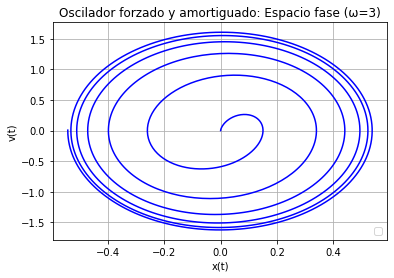

No handles with labels found to put in legend.


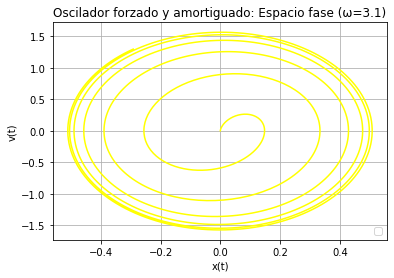

No handles with labels found to put in legend.


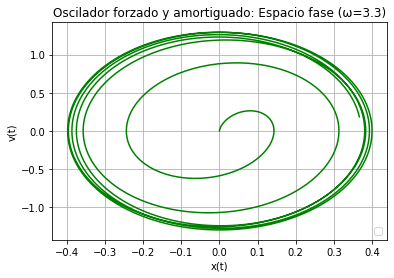

No handles with labels found to put in legend.


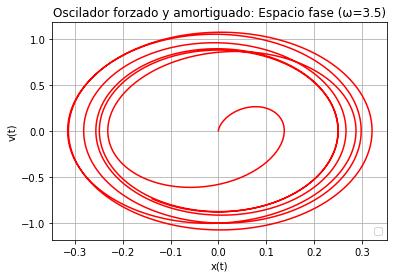

In [385]:
#Graficamos el espacio fase para cada caso
f1 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x1, v1, 'b');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado y amortiguado: Espacio fase (ω=3)');
plt.show();

f2 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x2, v2, 'yellow');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado y amortiguado: Espacio fase (ω=3.1)');
plt.show();

f3 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x3, v3, 'g');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado y amortiguado: Espacio fase (ω=3.3)');
plt.show();

f4 = plt.figure();
#plt.figure(figsize=(10, 5)); 
plt.plot(x4, v4, 'r');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('x(t)');
plt.ylabel('v(t)');
plt.title('Oscilador forzado y amortiguado: Espacio fase (ω=3.5)');
plt.show();

<Figure size 432x288 with 0 Axes>

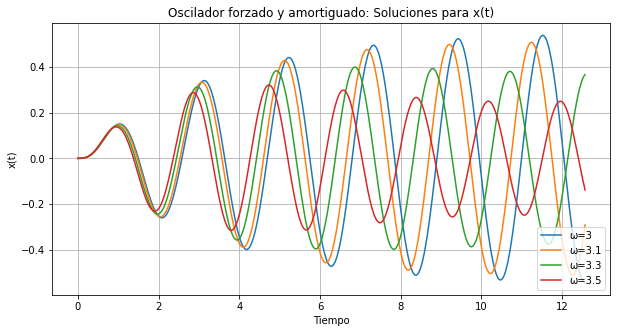

In [386]:
#Graficamos las soluciones de x(t)
f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x1, label='ω=3');
plt.plot(t, x2, label='ω=3.1');
plt.plot(t, x3, label='ω=3.3');
plt.plot(t, x4, label='ω=3.5');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('Tiempo');
plt.ylabel('x(t)');
plt.title('Oscilador forzado y amortiguado: Soluciones para x(t)');
plt.show();

<Figure size 432x288 with 0 Axes>

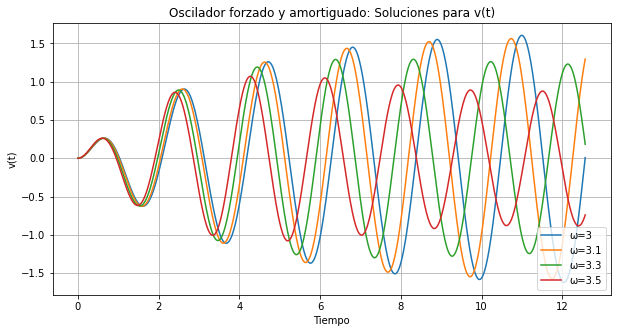

In [387]:
#Graficamos las soluciones de v(t)
f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, v1, label='ω=3');
plt.plot(t, v2, label='ω=3.1');
plt.plot(t, v3, label='ω=3.3');
plt.plot(t, v4, label='ω=3.5');
plt.grid();
plt.legend(loc='lower right');
plt.xlabel('Tiempo');
plt.ylabel('v(t)');
plt.title('Oscilador forzado y amortiguado: Soluciones para v(t)');
plt.show();